In [1]:
!git clone https://github.com/huggingface/diffusers.git
!cd /content/diffusers && pip install .
!pip install git+https://github.com/huggingface/transformers.git
!pip install scipy ftfy accelerate
!pip install "ipywidgets>=7,<8"
!pip install -U git+https://github.com/huggingface/transformers.git

Cloning into 'diffusers'...
remote: Enumerating objects: 15464, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 15464 (delta 85), reused 87 (delta 35), pack-reused 15296
Receiving objects: 100% (15464/15464), 10.47 MiB | 14.05 MiB/s, done.
Resolving deltas: 100% (10663/10663), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/diffusers
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ...

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install wandb
import wandb
wandb.login(key="2e933b7b4892d6d2a225aa35820ab77a99d60116")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.6 MB/s 
     |████████████████████████████████| 168 kB 49.7 MB/s 
     |████████████████████████████████| 182 kB 71.6 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 168 kB 24.2 MB/s 
     |████████████████████████████████| 166 kB 63.1 MB/s 
     |████████████████████████████████| 166 kB 60.3 MB/s 
     |████████████████████████████████| 162 kB 61.0 MB/s 
     |████████████████████████████████| 162 kB 56.2 MB/s 
     |████████████████████████████████| 158 kB 58.6 MB/s 
     |████████████████████████████████| 157 kB 65.3 MB/s 
     |████████████████████████████████| 157 kB 56.1 MB/s 
     |████████████████████████████████| 157 kB 59.0 MB/s 
     |████████████████████████████████| 157 kB 59.6 MB/s 
     |████████████████████████████████| 157 kB 70.5 MB/s 
     |████████████████████████████

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [12]:
api = wandb.Api()
artifact = api.artifact('janoliver/stable-diffusion2/SD2.1_2750_finetuned_jseidenfuss:v0', type='model')
artifact_dir = artifact.download()

wandb: Downloading large artifact SD2.1_2750_finetuned_jseidenfuss:v0, 9845.50MB. 18 files... 
wandb:   18 of 18 files downloaded.  
Done. 0:4:31.4


In [18]:
import torch
import requests
from PIL import Image

from diffusers import StableDiffusionDepth2ImgPipeline, StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

pipe_og = StableDiffusionImg2ImgPipeline.from_pretrained(
    "/content/artifacts/SD2.1_2750_finetuned_jseidenfuss:v0",
    torch_dtype=torch.float16,
    feature_extractor=None,
    requires_safety_checker=False
).to("cuda")

In [4]:
from transformers import CLIPTextModel, CLIPTokenizer, DPTFeatureExtractor, DPTForDepthEstimation

!git lfs install
!git clone https://huggingface.co/stabilityai/stable-diffusion-2-depth

feature_extractor = DPTFeatureExtractor.from_pretrained("/content/stable-diffusion-2-depth/feature_extractor")

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.
Cloning into 'stable-diffusion-2-depth'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 73 (delta 18), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (73/73), done.
tcmalloc: large alloc 1471086592 bytes == 0x55b3e3cec000 @  0x7f25b0bbe2a4 0x55b3a739578f 0x55b3a73728db 0x55b3a73275b3 0x55b3a72cb34a 0x55b3a72cb806 0x55b3a72e8ad1 0x55b3a72e9069 0x55b3a72e9593 0x55b3a738e482 0x55b3a722ecc2 0x55b3a7215a75 0x55b3a7216735 0x55b3a721573a 0x7f25aff05c87 0x55b3a721578a
tcmalloc: large alloc 1471086592 bytes == 0x55b3e3cec000 @  0x7f25b0bbe2a4 0x55b3a739578f 0x55b3a73728db 0x55b3a73275b3 0x55b3a72cb34a 0x55b3a72cb806 0x55b3a72e8ad1 0x55b3a72e9069 0x55b3a72e9593 0x55b3a738e482 0x55b3a722ecc2 0x55b3a7215a75 0x55b3a7216735 0x55b3a72

/usr/local/lib/python3.8/dist-packages/transformers/models/dpt/feature_extraction_dpt.py:28: FutureWarning: The class DPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DPTImageProcessor instead.
  warnings.warn(


NameError: ignored

In [13]:
from diffusers import StableDiffusionDepth2ImgPipeline, StableDiffusionPipeline, StableDiffusionImg2ImgPipeline
import torch 

feature_extractor_pipeline = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
).to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [14]:
feature_extractor_from_pipeline = feature_extractor_pipeline.feature_extractor

In [15]:
feature_extractor_from_pipeline

DPTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "ensure_multiple_of": 1,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "DPTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "keep_aspect_ratio": false,
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

In [10]:
feature_extractor

DPTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "ensure_multiple_of": 1,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "DPTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "keep_aspect_ratio": false,
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

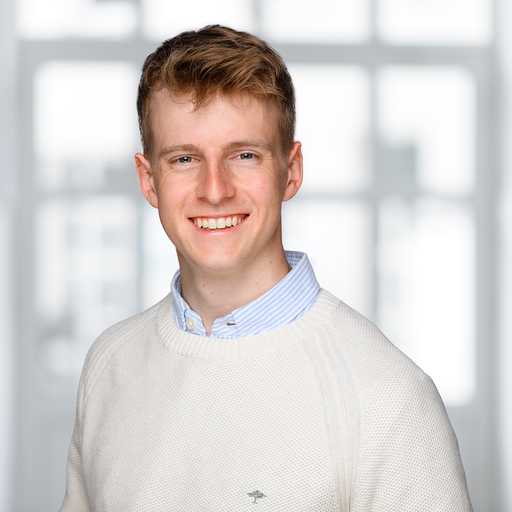

In [16]:
from IPython.display import display
import requests
from PIL import Image


url = "https://ca.slack-edge.com/TUTJQ5RNV-U02P1ET637V-7d91d73a4fd4-512"
init_image = Image.open(requests.get(url, stream=True).raw)

output_1 = feature_extractor_from_pipeline(images=init_image, return_tensors="pt").pixel_values[0]
output_2 = feature_extractor(images=init_image, return_tensors="pt").pixel_values[0]

display(init_image)

In [18]:
torch.sum(output_1 == output_2)

tensor(442368)

In [19]:
output_1.shape

torch.Size([3, 384, 384])

  0%|          | 0/41 [00:00<?, ?it/s]

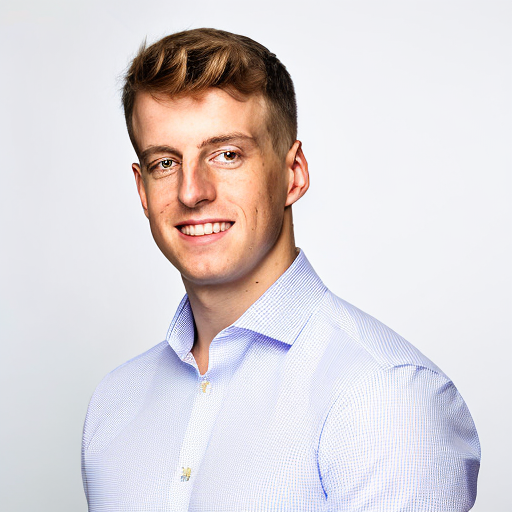

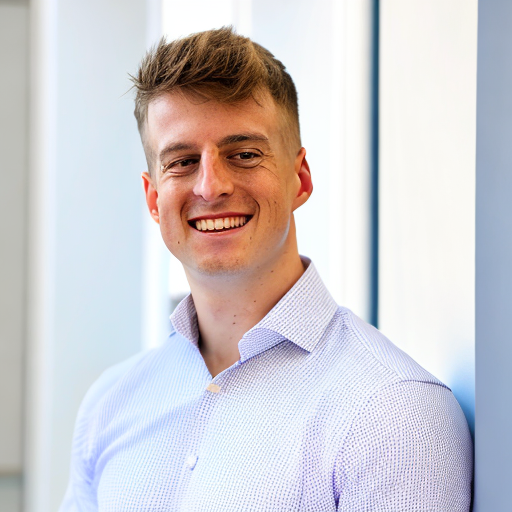

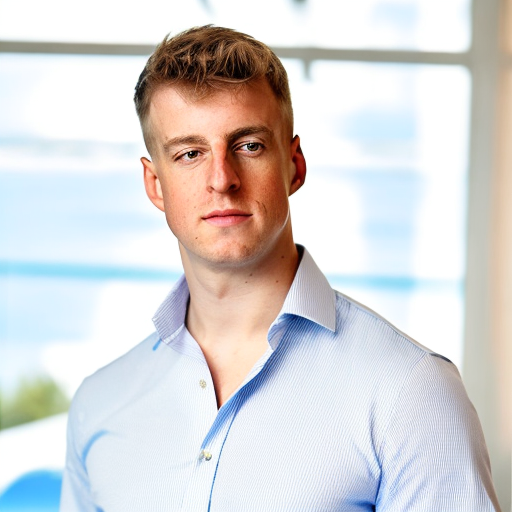

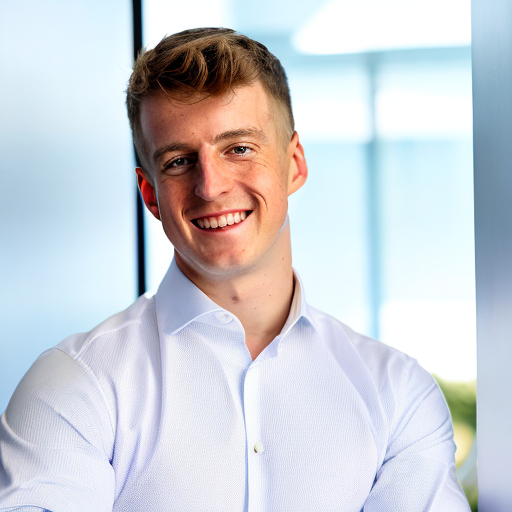

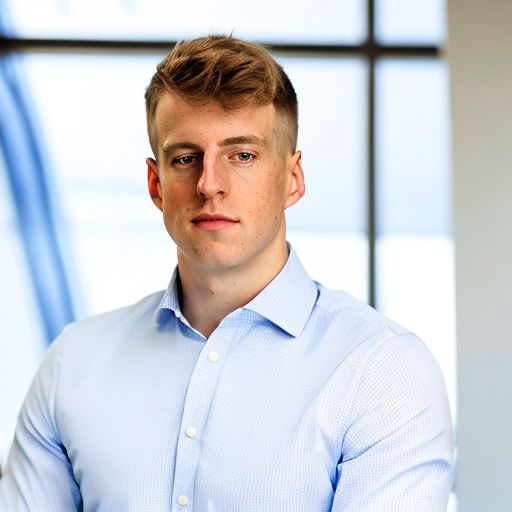

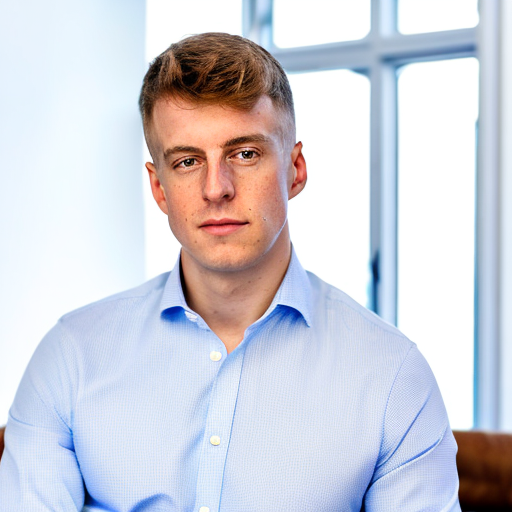

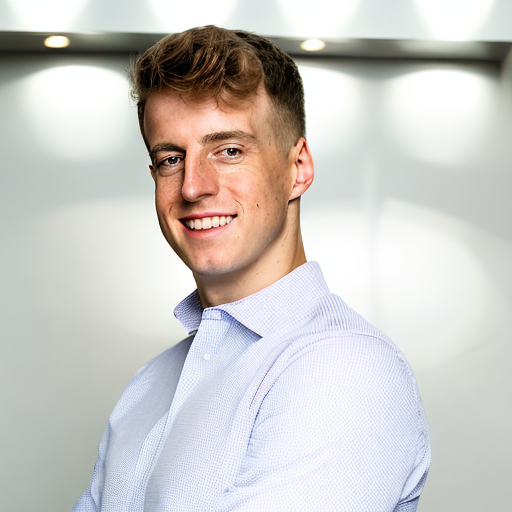

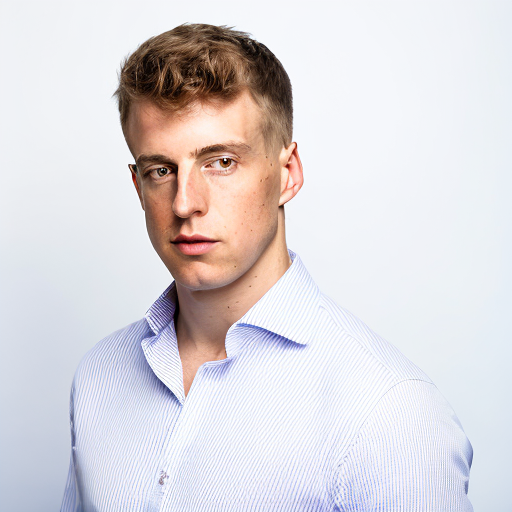

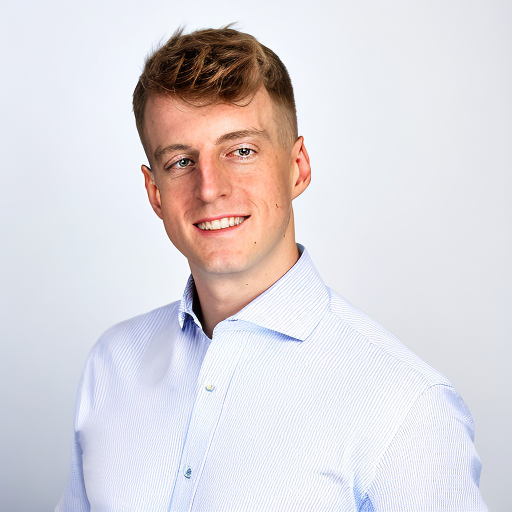

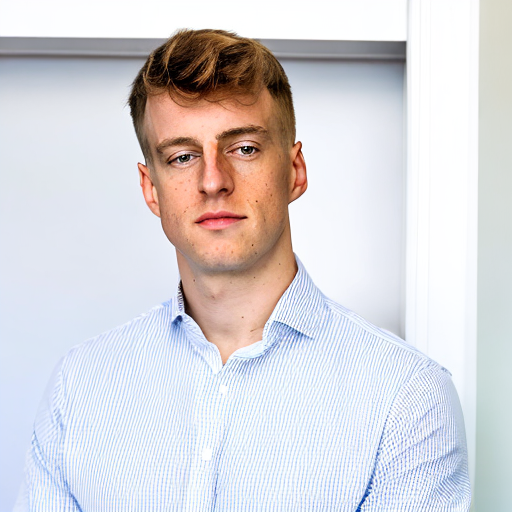

In [28]:
prompt = "portrait of jseidenfuss in a tailored blue suit, chest up, good posture, regular studio lighting, canonm50, clear and realistic face, uhd faces, detailed skin texture"
n_propmt = "blender, ugly, multiple hands, bad anatomy, bad proportions, unrealistic, full body, cropped, lowres, poorly drawn face, out of frame, poorly drawn hands, double, blurred, disfigured, deformed, repetitive, black and white"
#0.80
#0.825
images = pipe_og(prompt=prompt, image=init_image, num_images_per_prompt=10, negative_prompt=n_propmt, strength=0.825).images

for image in images:
  display(image)

In [20]:
pipeline = feature_extractor_pipeline

### Prepare image

In [27]:
import contextlib
import inspect
from typing import Callable, List, Optional, Union

import numpy as np
import torch

import PIL
from diffusers.utils import is_accelerate_available
from packaging import version
from transformers import CLIPTextModel, CLIPTokenizer, DPTFeatureExtractor, DPTForDepthEstimation

from diffusers.utils import PIL_INTERPOLATION, deprecate, logging

In [28]:
def preprocess(image):
    if isinstance(image, torch.Tensor):
        return image
    elif isinstance(image, PIL.Image.Image):
        image = [image]

    if isinstance(image[0], PIL.Image.Image):
        w, h = image[0].size
        w, h = map(lambda x: x - x % 32, (w, h))  # resize to integer multiple of 32

        image = [np.array(i.resize((w, h), resample=PIL_INTERPOLATION["lanczos"]))[None, :] for i in image]
        image = np.concatenate(image, axis=0)
        image = np.array(image).astype(np.float32) / 255.0
        image = image.transpose(0, 3, 1, 2)
        image = 2.0 * image - 1.0
        image = torch.from_numpy(image)
    elif isinstance(image[0], torch.Tensor):
        image = torch.cat(image, dim=0)
    return image

In [29]:
init_image_preprocessed = preprocess(init_image)
print(init_image_preprocessed.shape)

torch.Size([1, 3, 512, 512])


### Generate latents

In [44]:
scheduler = pipeline.scheduler
vae = pipeline.vae
depth_estimator = pipeline.depth_estimator
vae_scale_factor = 2 ** (len(vae.config.block_out_channels) - 1)

In [49]:
pipeline.unet

UNet2DConditionModel(
  (conv_in): Conv2d(5, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0): Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Linear(in_features=320, out_features=320, bias=True)
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (attn1): CrossAttention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_features=320, bias=False)
                (to_out): ModuleList(
               

In [45]:
vae_scale_factor

8

### Set Timestamps

In [35]:
num_inference_steps = 50
strength = 0.8
device = torch.device("cuda")
batch_size = 1
num_images_per_prompt = 1
def get_timesteps(num_inference_steps, strength, device):
    # get the original timestep using init_timestep
    init_timestep = min(int(num_inference_steps * strength), num_inference_steps)

    t_start = max(num_inference_steps - init_timestep, 0)
    timesteps = scheduler.timesteps[t_start:]

    return timesteps, num_inference_steps - t_start

In [36]:
# 6. set timesteps
scheduler.set_timesteps(num_inference_steps, device=device)
timesteps, num_inference_steps = get_timesteps(num_inference_steps, strength, device)
print(timesteps)

tensor([801, 781, 761, 741, 721, 701, 681, 661, 641, 621, 601, 581, 561, 541,
        521, 501, 481, 461, 441, 421, 401, 381, 361, 341, 321, 301, 281, 261,
        241, 221, 201, 181, 161, 141, 121, 101,  81,  61,  41,  21,   1],
       device='cuda:0')


In [37]:
latent_timestep = timesteps[:1].repeat(batch_size * num_images_per_prompt)
print(latent_timestep)

tensor([801], device='cuda:0')


### Prepare depth map

In [46]:
def prepare_depth_map(image, depth_map, batch_size, do_classifier_free_guidance, dtype, device):
    if isinstance(image, PIL.Image.Image):
        image = [image]
    else:
        image = [img for img in image]

    if isinstance(image[0], PIL.Image.Image):
        width, height = image[0].size
    else:
        width, height = image[0].shape[-2:]

    if depth_map is None:
        pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
        pixel_values = pixel_values.to(device=device)
        # The DPT-Hybrid model uses batch-norm layers which are not compatible with fp16.
        # So we use `torch.autocast` here for half precision inference.
        context_manger = torch.autocast("cuda", dtype=dtype) if device.type == "cuda" else contextlib.nullcontext()
        with context_manger:
            depth_map = depth_estimator(pixel_values).predicted_depth
    else:
        depth_map = depth_map.to(device=device, dtype=dtype)

    depth_map = torch.nn.functional.interpolate(
        depth_map.unsqueeze(1),
        size=(height // vae_scale_factor, width // vae_scale_factor),
        mode="bicubic",
        align_corners=False,
    )

    depth_min = torch.amin(depth_map, dim=[1, 2, 3], keepdim=True)
    depth_max = torch.amax(depth_map, dim=[1, 2, 3], keepdim=True)
    depth_map = 2.0 * (depth_map - depth_min) / (depth_max - depth_min) - 1.0
    depth_map = depth_map.to(dtype)

    # duplicate mask and masked_image_latents for each generation per prompt, using mps friendly method
    if depth_map.shape[0] < batch_size:
        depth_map = depth_map.repeat(batch_size, 1, 1, 1)

    depth_map = torch.cat([depth_map] * 2) if do_classifier_free_guidance else depth_map
    return depth_map

In [48]:
depth_map = None
depth_mask = prepare_depth_map(
            init_image,
            depth_map,
            batch_size * num_images_per_prompt,
            False,
            torch.float16,
            device,
        )
print(depth_mask.shape)

torch.Size([1, 1, 64, 64])


### Prepare latents

In [38]:
def prepare_latents(image, timestep, batch_size, num_images_per_prompt, dtype, device, generator=None):
    image = image.to(device=device, dtype=dtype)
    init_latent_dist = vae.encode(image).latent_dist
    init_latents = init_latent_dist.sample(generator=generator)
    init_latents = 0.18215 * init_latents

    if batch_size > init_latents.shape[0] and batch_size % init_latents.shape[0] == 0:
        # expand init_latents for batch_size
        deprecation_message = (
            f"You have passed {batch_size} text prompts (`prompt`), but only {init_latents.shape[0]} initial"
            " images (`image`). Initial images are now duplicating to match the number of text prompts. Note"
            " that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update"
            " your script to pass as many initial images as text prompts to suppress this warning."
        )
        deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)
        additional_image_per_prompt = batch_size // init_latents.shape[0]
        init_latents = torch.cat([init_latents] * additional_image_per_prompt * num_images_per_prompt, dim=0)
    elif batch_size > init_latents.shape[0] and batch_size % init_latents.shape[0] != 0:
        raise ValueError(
            f"Cannot duplicate `image` of batch size {init_latents.shape[0]} to {batch_size} text prompts."
        )
    else:
        init_latents = torch.cat([init_latents] * num_images_per_prompt, dim=0)

    # add noise to latents using the timesteps
    noise = torch.randn(init_latents.shape, generator=generator, device=device, dtype=dtype)

    # get latents
    init_latents = scheduler.add_noise(init_latents, noise, timestep)
    latents = init_latents

    return latents

In [40]:
# 7. Prepare latent variables
latents = prepare_latents(
    init_image_preprocessed, latent_timestep, batch_size, num_images_per_prompt, torch.float16, device, None
)
print(latents.shape)

torch.Size([1, 4, 64, 64])


### Denoising step

In [41]:
# 9. Denoising loop
num_warmup_steps = len(timesteps) - num_inference_steps * scheduler.order
for i, t in enumerate(timesteps):
    # expand the latents if we are doing classifier free guidance
    latent_model_input = latents
    latent_model_input = scheduler.scale_model_input(latent_model_input, t)
    print(latent_model_input.shape)

torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
t

In [ ]:
image = image.to(device=device, dtype=dtype)
init_latent_dist = vae.encode(image).latent_dist
init_latents = init_latent_dist.sample(generator=generator)
init_latents = 0.18215 * init_latents

if batch_size > init_latents.shape[0] and batch_size % init_latents.shape[0] == 0:
    # expand init_latents for batch_size
    deprecation_message = (
        f"You have passed {batch_size} text prompts (`prompt`), but only {init_latents.shape[0]} initial"
        " images (`image`). Initial images are now duplicating to match the number of text prompts. Note"
        " that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update"
        " your script to pass as many initial images as text prompts to suppress this warning."
    )
    deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)
    additional_image_per_prompt = batch_size // init_latents.shape[0]
    init_latents = torch.cat([init_latents] * additional_image_per_prompt * num_images_per_prompt, dim=0)
elif batch_size > init_latents.shape[0] and batch_size % init_latents.shape[0] != 0:
    raise ValueError(
        f"Cannot duplicate `image` of batch size {init_latents.shape[0]} to {batch_size} text prompts."
    )
else:
    init_latents = torch.cat([init_latents] * num_images_per_prompt, dim=0)

# add noise to latents using the timesteps
noise = torch.randn(init_latents.shape, generator=generator, device=device, dtype=dtype)

# get latents
init_latents = self.scheduler.add_noise(init_latents, noise, timestep)
latents = init_latents

return latents

In [22]:
import torch
import requests
from PIL import Image

from diffusers import StableDiffusionDepth2ImgPipeline, StableDiffusionPipeline, StableDiffusionImg2ImgPipeline

"""pipe_og = StableDiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-1-base",
        revision="fp16", 
        torch_dtype=torch.float16,
        requires_safety_checker=False
    ).to("cuda")"""


"""pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
).to("cuda")"""
# load the pipeline
device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id_or_path,
    revision="fp16", 
    torch_dtype=torch.float16,
)
# or download via git clone https://huggingface.co/runwayml/stable-diffusion-v1-5
# and pass `model_id_or_path="./stable-diffusion-v1-5"`.
pipe = pipe.to(device)

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/307 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/636 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/822 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/609 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

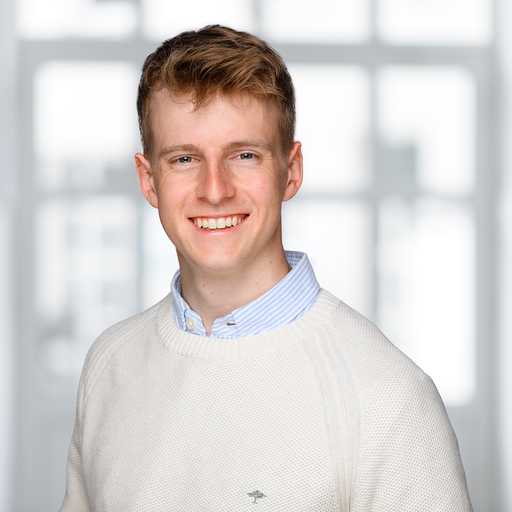

In [24]:
from IPython.display import display
import torch
import requests
from PIL import Image


url = "https://ca.slack-edge.com/TUTJQ5RNV-U02P1ET637V-7d91d73a4fd4-512"
init_image = Image.open(requests.get(url, stream=True).raw)
display(init_image)

  0%|          | 0/42 [00:00<?, ?it/s]

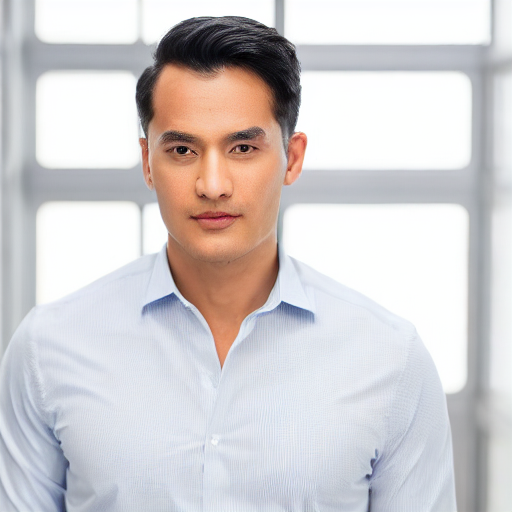

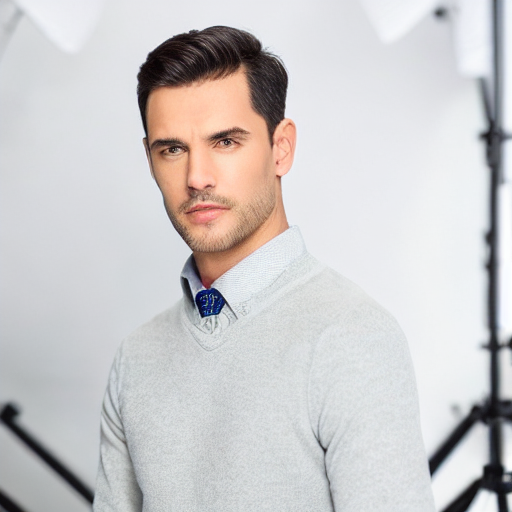

In [28]:
prompt = "portrait of a man ((with black hair)), regular studio lighting, canonm50, clear and realistic face, uhd faces, detailed skin texture"
n_propmt = "blender, ugly, multiple hands, bad anatomy, bad proportions, unrealistic, full body, cropped, lowres, poorly drawn face, out of frame, poorly drawn hands, double, blurred, disfigured, deformed, repetitive, black and white"
images = pipe(prompt=prompt, image=init_image, num_images_per_prompt=2, negative_prompt=n_propmt, strength=0.85).images

for image in images:
  display(image)

In [ ]:
!git lfs install
!git clone https://huggingface.co/stabilityai/stable-diffusion-2-depth

from transformers import CLIPTextModel, CLIPTokenizer, DPTFeatureExtractor, DPTForDepthEstimation

depth_estimator = DPTForDepthEstimation.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    subfolder="depth_estimator",
    revision="fp16",
)

from transformers import DPTFeatureExtractor
feature_extractor = DPTFeatureExtractor.from_pretrained("/content/stable-diffusion-2-depth/feature_extractor")

In [ ]:
blender, ugly, multiple hands, bad anatomy, bad proportions, unrealistic, full body, cropped, lowres, poorly drawn face, out of frame, poorly drawn hands, double, blurred, disfigured, deformed, repetitive, black and white

In [7]:
from diffusers.utils.pil_utils import PIL_INTERPOLATION
import PIL
import contextlib
image = init_image
vae_scale_factor = 2 ** (len(pipe.vae.config.block_out_channels) - 1)
print(vae_scale_factor)
if isinstance(image, PIL.Image.Image):
    width, height = image.size
    width, height = map(lambda dim: dim - dim % 32, (width, height))  # resize to integer multiple of 32
    print(width)
    image = image.resize((width, height), resample=PIL_INTERPOLATION["lanczos"])
    width, height = image.size
    print(width)
else:
    image = [img for img in image]
    width, height = image[0].shape[-2:]

8
640
640


In [31]:
import numpy as np
from matplotlib import pyplot as plt

def plot_stuff_cpu(pixel_values):
  pixel_vals = pixel_values
  d, w, h = pixel_vals.shape
  pixel_vals = np.reshape(pixel_vals, (w, h, d))
  plt.imshow(pixel_vals, interpolation='nearest')
  plt.show()

def plot_stuff_gpu(pixel_values):
  pixel_vals = pixel_values.cpu().detach().numpy()[0]
  print(pixel_vals.shape)
  d, w, h = pixel_vals.shape
  pixel_vals = np.reshape(pixel_vals, (w, h, d))
  plt.imshow(pixel_vals, interpolation='nearest')
  plt.show()

In [25]:
device = torch.device("cuda")
dtype = torch.float16
pixel_values = pipe.feature_extractor(images=image, return_tensors="pt").pixel_values

In [33]:
pixel_values

tensor([[[[ 0.1137,  0.1373,  0.1529,  ..., -0.1686, -0.2078, -0.1843],
          [ 0.0980,  0.1294,  0.2000,  ..., -0.2078, -0.1843, -0.2000],
          [ 0.1216,  0.1529,  0.1765,  ..., -0.1922, -0.1922, -0.2157],
          ...,
          [ 0.8275,  0.8353,  0.7882,  ...,  0.5059,  0.4510,  0.4196],
          [ 0.8039,  0.8196,  0.7490,  ...,  0.1843,  0.0745, -0.0353],
          [ 0.8667,  0.8196,  0.7098,  ..., -0.2471, -0.3333, -0.3804]],

         [[-0.8039, -0.8196, -0.8353,  ..., -0.9137, -0.8902, -0.9059],
          [-0.8039, -0.8039, -0.7804,  ..., -0.8824, -0.8980, -0.8824],
          [-0.7804, -0.7804, -0.7882,  ..., -0.8588, -0.8824, -0.8824],
          ...,
          [-0.2706, -0.2549, -0.2941,  ..., -0.5216, -0.5608, -0.5608],
          [-0.3176, -0.2863, -0.3333,  ..., -0.7020, -0.7490, -0.8275],
          [-0.2235, -0.2784, -0.3882,  ..., -0.8431, -0.8667, -0.8667]],

         [[-0.5373, -0.4824, -0.4510,  ..., -0.6941, -0.6941, -0.7176],
          [-0.5922, -0.5686, -

In [13]:
display(pixel_values.cpu().detach().numpy()[0])

array([[[ 0.11372554,  0.13725495,  0.15294123, ..., -0.16862744,
         -0.20784312, -0.18431371],
        [ 0.09803927,  0.12941182,  0.20000005, ..., -0.20784312,
         -0.18431371, -0.19999999],
        [ 0.12156868,  0.15294123,  0.17647064, ..., -0.19215685,
         -0.19215685, -0.21568626],
        ...,
        [ 0.827451  ,  0.8352941 ,  0.7882353 , ...,  0.5058824 ,
          0.45098042,  0.41960788],
        [ 0.8039216 ,  0.81960785,  0.7490196 , ...,  0.18431377,
          0.07450986, -0.03529412],
        [ 0.8666667 ,  0.81960785,  0.70980394, ..., -0.24705881,
         -0.3333333 , -0.38039213]],

       [[-0.8039216 , -0.81960785, -0.8352941 , ..., -0.9137255 ,
         -0.8901961 , -0.90588236],
        [-0.8039216 , -0.8039216 , -0.78039217, ..., -0.88235295,
         -0.8980392 , -0.88235295],
        [-0.78039217, -0.78039217, -0.7882353 , ..., -0.85882354,
         -0.88235295, -0.88235295],
        ...,
        [-0.27058822, -0.25490195, -0.29411763, ..., -

In [ ]:
pixel_values = pixel_values.to(device=device)
# The DPT-Hybrid model uses batch-norm layers which are not compatible with fp16.
# So we use `torch.autocast` here for half precision inference.
context_manger = torch.autocast("cuda", dtype=dtype) if device.type == "cuda" else contextlib.nullcontext()
with context_manger:
    depth_map = pipe.depth_estimator(pixel_values).predicted_depth

In [ ]:
depth_map = torch.nn.functional.interpolate(
    depth_map.unsqueeze(1),
    size=(height // vae_scale_factor, width // vae_scale_factor),
    mode="bicubic",
    align_corners=False,
)

depth_min = torch.amin(depth_map, dim=[1, 2, 3], keepdim=True)
depth_max = torch.amax(depth_map, dim=[1, 2, 3], keepdim=True)
depth_map = 2.0 * (depth_map - depth_min) / (depth_max - depth_min) - 1.0
depth_map = depth_map.to(dtype)

# duplicate mask and masked_image_latents for each generation per prompt, using mps friendly method
if depth_map.shape[0] < batch_size:
    depth_map = depth_map.repeat(batch_size, 1, 1, 1)

depth_map = torch.cat([depth_map] * 2) if do_classifier_free_guidance else depth_map
return depth_map

In [1]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import torch
mask = torch.rand(8, 1, 1, 1)
print(mask.shape)
mask = torch.cat([mask] * 2)
print(mask.shape)

torch.Size([8, 1, 1, 1])
torch.Size([16, 1, 1, 1])
